In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import time
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
#Randomize latitudes and longitudes

lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

coordinates = list(lat_lngs)

In [3]:
# Create URL from the open weather map API and include our API key to the end

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create an empty list for holding the cities
cities = []

# Use a for loop to identify nearest city for each latitude and longitude combination using the citipy module
for coordinate in coordinates:
    
    # Use the citipy module to identify the nearest city to the current coordinate
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [5]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        #we can only gather 60 calls per minute from API for free. Pause the program for 60 seconds.
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | dinajpur
Processing Record 3 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | acapulco
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ulaangom
Processing Record 9 of Set 1 | port blair
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | santos reyes nopala
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | lichuan
Processing Record 20 of Set 1 | the valley
Processing Record 21 of Set 1 | castro
Processing R

Processing Record 40 of Set 4 | lavrentiya
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | pringsewu
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | chapais
Processing Record 46 of Set 4 | enderby
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | muros
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | myra
Processing Record 4 of Set 5 | xuddur
Processing Record 5 of Set 5 | vanderhoof
Processing Record 6 of Set 5 | grindavik
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | samarai
Processing Record 10 of Set 5 | port said
Processing Record 11 of Set 5 | makokou
Processing Record 12 of Set 5 | rosa

Processing Record 30 of Set 8 | sibolga
Processing Record 31 of Set 8 | kirkwall
Processing Record 32 of Set 8 | xuanzhou
Processing Record 33 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 8 | touros
Processing Record 35 of Set 8 | laukaa
Processing Record 36 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 37 of Set 8 | otradnoye
Processing Record 38 of Set 8 | diego de almagro
Processing Record 39 of Set 8 | kemijarvi
Processing Record 40 of Set 8 | viesca
Processing Record 41 of Set 8 | villagarzon
Processing Record 42 of Set 8 | sragen
Processing Record 43 of Set 8 | makung
City not found. Skipping...
Processing Record 44 of Set 8 | tautira
Processing Record 45 of Set 8 | demyanovo
Processing Record 46 of Set 8 | balkhash
Processing Record 47 of Set 8 | liberty
Processing Record 48 of Set 8 | broken hill
Processing Record 49 of Set 8 | lexington
Processing Record 50 of Set 8 | zenzeli
Processing Record 1 of Set 9 | nola
Processin

Processing Record 17 of Set 12 | lima
Processing Record 18 of Set 12 | parauna
Processing Record 19 of Set 12 | mangrol
Processing Record 20 of Set 12 | oyama
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | baghmara
Processing Record 23 of Set 12 | majengo
Processing Record 24 of Set 12 | tyup
Processing Record 25 of Set 12 | chipinge
Processing Record 26 of Set 12 | sinkat
City not found. Skipping...
Processing Record 27 of Set 12 | arbroath
Processing Record 28 of Set 12 | pervomayskoye
Processing Record 29 of Set 12 | tarauaca
Processing Record 30 of Set 12 | eldorado
Processing Record 31 of Set 12 | georgiyevskoye
Processing Record 32 of Set 12 | maragogi
Processing Record 33 of Set 12 | opuwo
Processing Record 34 of Set 12 | puerto escondido
Processing Record 35 of Set 12 | walvis bay
Processing Record 36 of Set 12 | port lincoln
Processing Record 37 of Set 12 | abu kamal
Processing Record 38 of Set 12 | bac lieu
Processing Record 39 of Set 12 | amga


In [6]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,58.48,88,100,8.16,NZ,2022-11-18 18:17:22
1,Dinajpur,25.6272,88.6386,67.10,66,13,5.14,BD,2022-11-18 18:17:04
2,Saint-Philippe,-21.3585,55.7679,71.19,70,16,5.46,RE,2022-11-18 18:17:22
3,Acapulco,16.8634,-99.8901,89.42,51,0,5.75,MX,2022-11-18 18:17:14
4,Punta Arenas,-53.1500,-70.9167,60.91,33,75,23.02,CL,2022-11-18 18:15:11
5,Ulaangom,49.9811,92.0667,11.35,79,25,4.29,MN,2022-11-18 18:17:23
6,Port Blair,11.6667,92.7500,79.83,83,95,8.86,IN,2022-11-18 18:17:23
7,Ushuaia,-54.8000,-68.3000,62.26,31,40,12.66,AR,2022-11-18 18:14:53
8,Tasiilaq,65.6145,-37.6368,39.36,79,100,25.39,GL,2022-11-18 18:17:24
9,Leningradskiy,69.3833,178.4167,-4.97,96,78,4.25,RU,2022-11-18 18:17:24


In [7]:
new_column_order = ['City','Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity' ,'Cloudiness', 'Wind Speed']

In [8]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-11-18 18:17:22,-46.1927,168.8643,58.48,88,100,8.16
1,Dinajpur,BD,2022-11-18 18:17:04,25.6272,88.6386,67.10,66,13,5.14
2,Saint-Philippe,RE,2022-11-18 18:17:22,-21.3585,55.7679,71.19,70,16,5.46
3,Acapulco,MX,2022-11-18 18:17:14,16.8634,-99.8901,89.42,51,0,5.75
4,Punta Arenas,CL,2022-11-18 18:15:11,-53.1500,-70.9167,60.91,33,75,23.02
5,Ulaangom,MN,2022-11-18 18:17:23,49.9811,92.0667,11.35,79,25,4.29
6,Port Blair,IN,2022-11-18 18:17:23,11.6667,92.7500,79.83,83,95,8.86
7,Ushuaia,AR,2022-11-18 18:14:53,-54.8000,-68.3000,62.26,31,40,12.66
8,Tasiilaq,GL,2022-11-18 18:17:24,65.6145,-37.6368,39.36,79,100,25.39
9,Leningradskiy,RU,2022-11-18 18:17:24,69.3833,178.4167,-4.97,96,78,4.25


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extracting fields for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

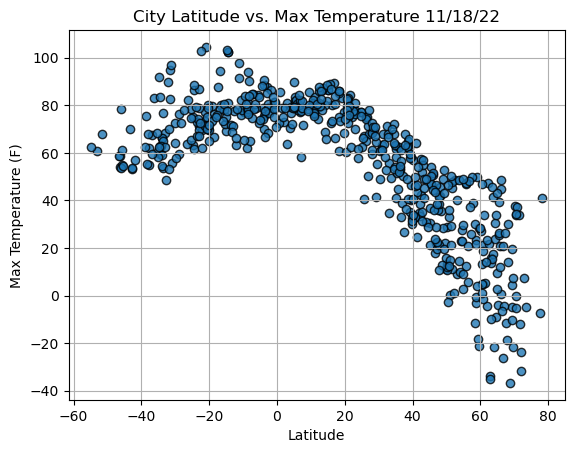

In [27]:
# Import Time module and todays date in seconds
import time 

# Build the scatter plot for latitude vs Max Temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

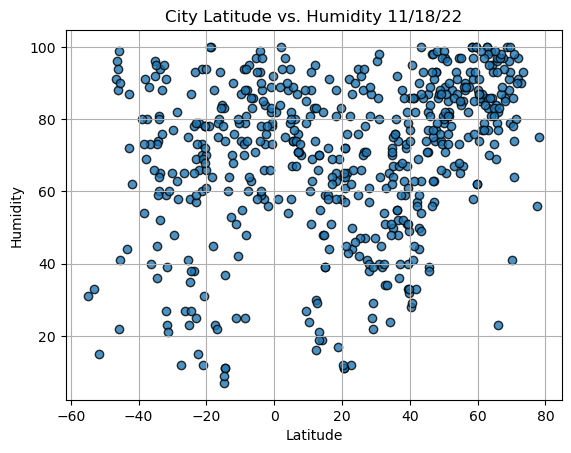

In [28]:
# Build the scatter plot for latitude vs Humidity 
plt.scatter(lats,
            humidity,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

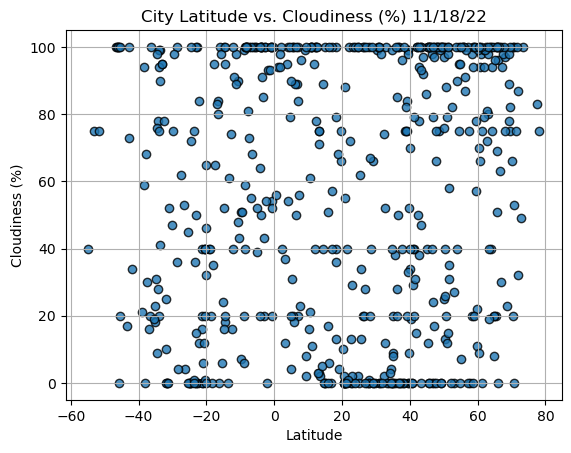

In [29]:
# Build the scatter plot for latitude vs Cloudiness 
plt.scatter(lats,
            cloudiness,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

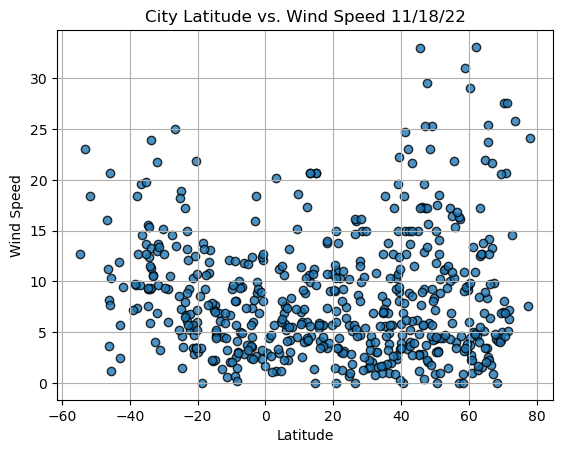

In [30]:
# Build the scatter plot for latitude vs Cloudiness 
plt.scatter(lats,
            wind_speed,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()